# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from matplotlib import rcParams

from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import PowerTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from keras.models import Sequential
from keras.layers import Dense

# Some preprocessing

In [2]:
data = pd.read_csv("./collected_data/prepared_data/pre_and_post_step_data.csv")
data.head()

,vertices_pre,redexes_pre,heights_pre,widths_pre,vertices_post,redexes_post,heights_post,widths_post,redex_depths,redex_indexes,steps_time,strategy_name
0,53,3,15,21,50,2,15,20,4,12,131224,LI
1,50,2,15,20,27,1,8,10,5,27,187277,LI
2,27,1,8,10,7,0,3,2,1,1,32085,LI
3,54,6,13,17,51,6,14,16,7,10,179030,LI
4,51,6,14,16,48,5,12,15,11,16,179197,LI


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   vertices_pre   3931 non-null   int64 
 1   redexes_pre    3931 non-null   int64 
 2   heights_pre    3931 non-null   int64 
 3   widths_pre     3931 non-null   int64 
 4   vertices_post  3931 non-null   int64 
 5   redexes_post   3931 non-null   int64 
 6   heights_post   3931 non-null   int64 
 7   widths_post    3931 non-null   int64 
 8   redex_depths   3931 non-null   int64 
 9   redex_indexes  3931 non-null   int64 
 10  steps_time     3931 non-null   int64 
 11  strategy_name  3931 non-null   object
dtypes: int64(11), object(1)
memory usage: 368.7+ KB


In [6]:
pca = PCA(2, random_state=42)
data_pca = pca.fit_transform(data[['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                                   'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                                   'redex_depths']])

C:\Users\voldo\AppData\Local\Temp\ipykernel_13924\2351182786.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], palette="deep")


<AxesSubplot: >

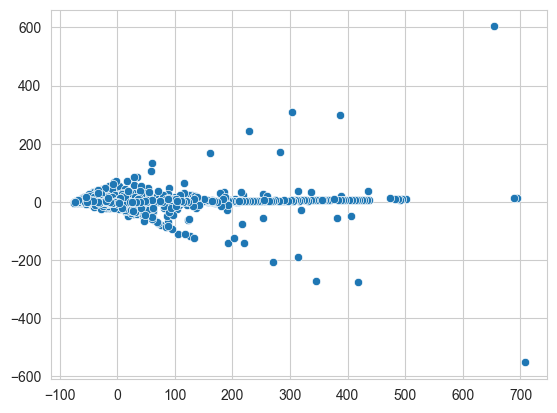

In [7]:
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], palette="deep")

<AxesSubplot: >

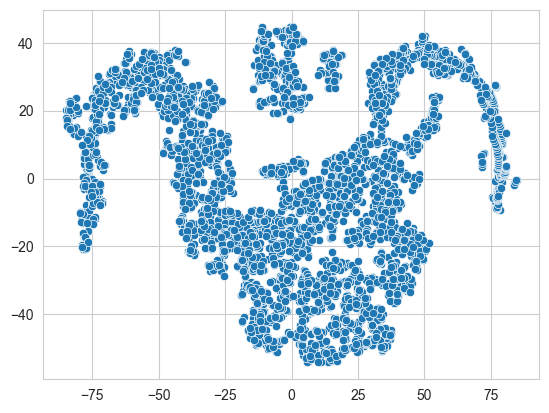

In [8]:
tsne = TSNE(random_state=3)
tsne_feature = tsne.fit_transform(data[['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                                        'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                                        'redex_depths']])
sns.scatterplot(x=tsne_feature[:, 0], y=tsne_feature[:, 1])

## Check skewed features

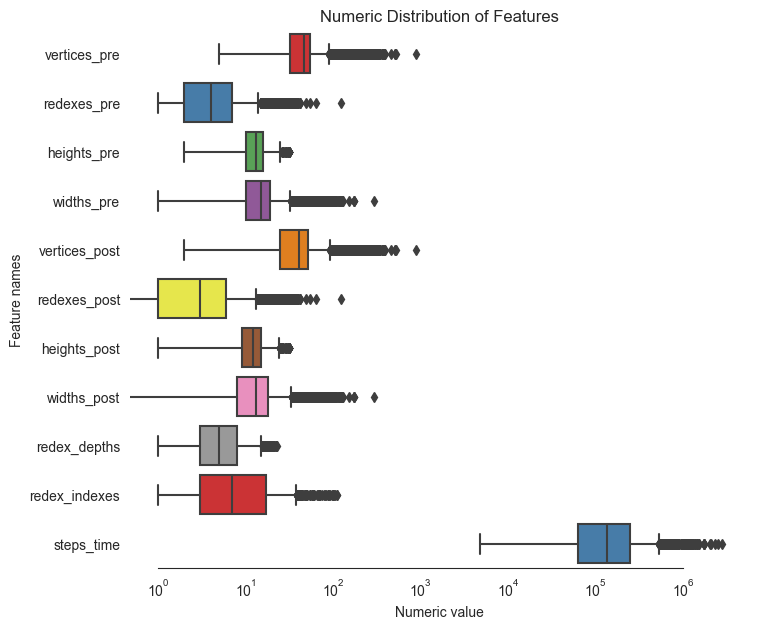

In [9]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data[['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                            'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                            'redex_depths', 'redex_indexes', 'steps_time']],
                 orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric value")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [10]:
# Find skewed numerical features
skew_features = data[['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                      'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                      'redex_depths', 'redex_indexes', 'steps_time']].apply(
    lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print(f"There are {high_skew.shape[0]} numerical features with skew > 0.5: ")
skewness = pd.DataFrame({"skew": skew_features})
skewness.head(10)

There are 9 numerical features with skew > 0.5: 


,skew
vertices_pre,4.235690
widths_pre,4.148381
vertices_post,4.031896
widths_post,3.973308
redexes_pre,3.953192
redexes_post,3.783563
steps_time,3.692667
redex_indexes,2.305134
redex_depths,1.034103
heights_pre,0.428418


array([[<AxesSubplot: title={'center': 'vertices_pre'}>,
        <AxesSubplot: title={'center': 'redexes_pre'}>,
        <AxesSubplot: title={'center': 'heights_pre'}>],
       [<AxesSubplot: title={'center': 'widths_pre'}>,
        <AxesSubplot: title={'center': 'vertices_post'}>,
        <AxesSubplot: title={'center': 'redexes_post'}>],
       [<AxesSubplot: title={'center': 'heights_post'}>,
        <AxesSubplot: title={'center': 'widths_post'}>,
        <AxesSubplot: title={'center': 'redex_depths'}>],
       [<AxesSubplot: title={'center': 'redex_indexes'}>,
        <AxesSubplot: title={'center': 'steps_time'}>, <AxesSubplot: >]],
      dtype=object)

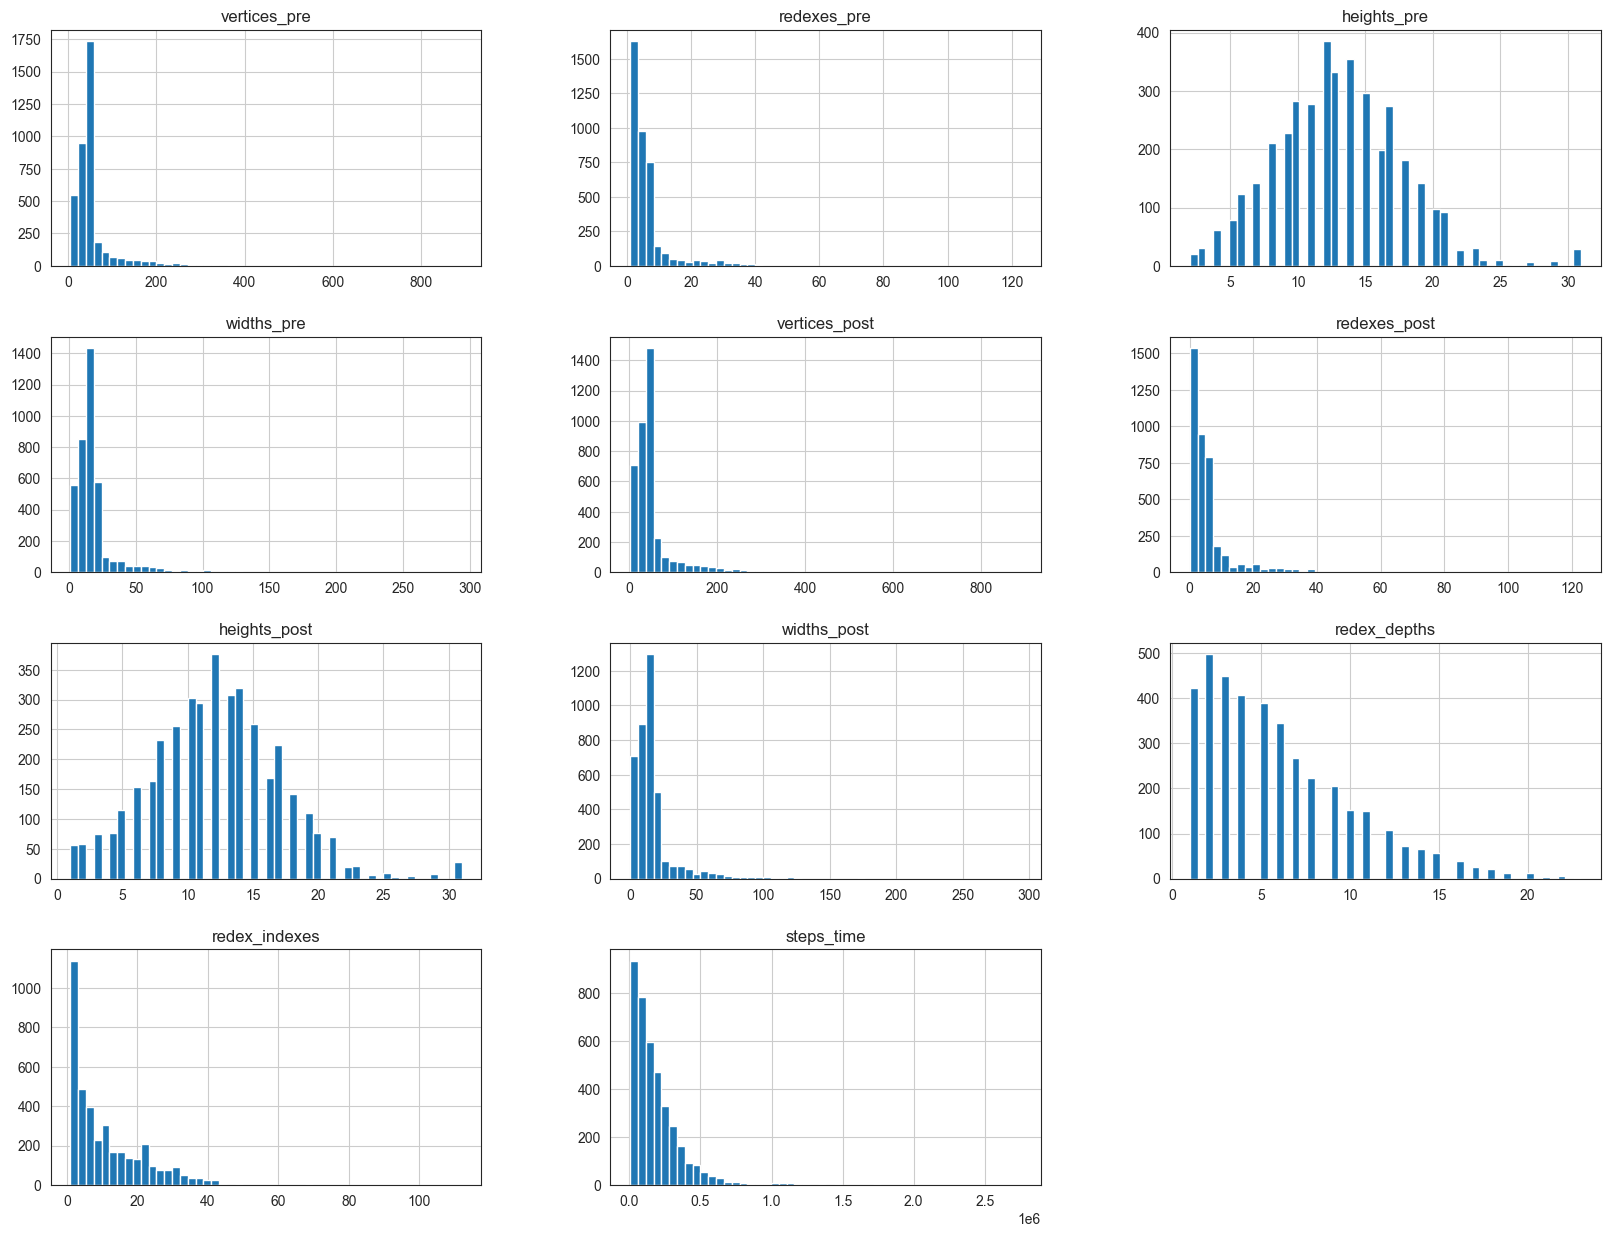

In [11]:
rcParams['figure.figsize'] = 20, 15
data.hist(bins=50)

array([[<AxesSubplot: title={'center': 'vertices_pre'}>,
        <AxesSubplot: title={'center': 'redexes_pre'}>,
        <AxesSubplot: title={'center': 'heights_pre'}>],
       [<AxesSubplot: title={'center': 'widths_pre'}>,
        <AxesSubplot: title={'center': 'vertices_post'}>,
        <AxesSubplot: title={'center': 'redexes_post'}>],
       [<AxesSubplot: title={'center': 'heights_post'}>,
        <AxesSubplot: title={'center': 'widths_post'}>,
        <AxesSubplot: title={'center': 'redex_depths'}>],
       [<AxesSubplot: title={'center': 'steps_time'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

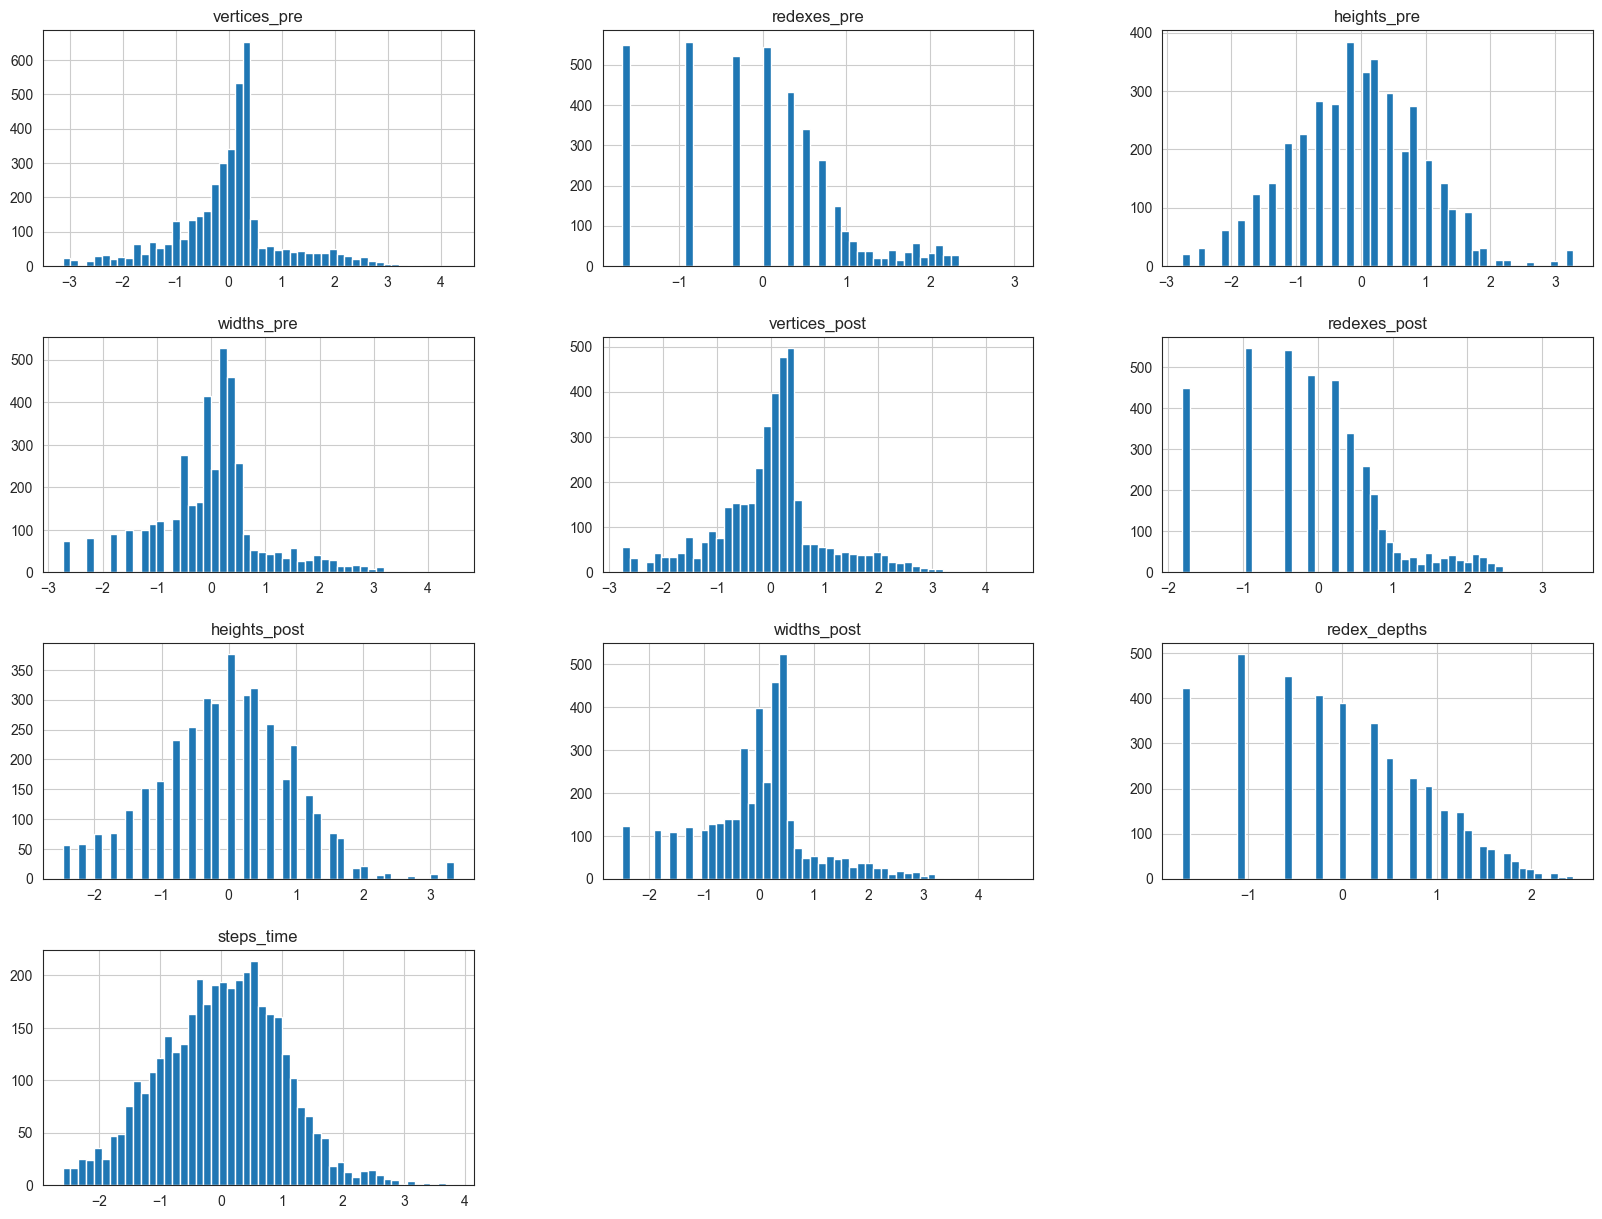

In [12]:
data_bc = pd.DataFrame()
power_trans = PowerTransformer(method='yeo-johnson')

for col_name in ['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                 'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                 'redex_depths', 'steps_time']:
    norm_col_data = power_trans.fit_transform(np.array(data[col_name]).reshape(-1, 1))
    data_bc[col_name] = list(norm_col_data.reshape(1, -1))[0]

data_bc.hist(bins=50)

In [13]:
data_for_training = data_bc.copy(deep=True)
data_for_training["heights_pre"] = data["heights_pre"]

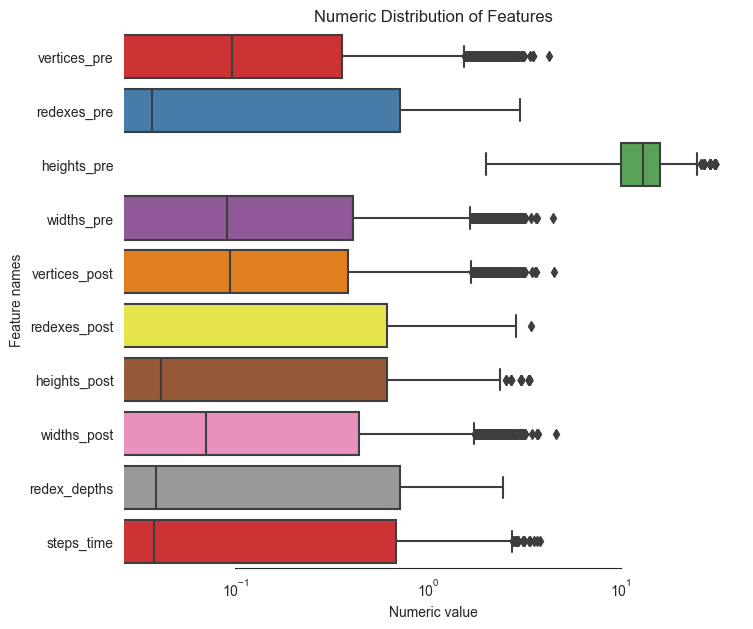

In [14]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data_for_training,
                 orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric value")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [15]:
# Find skewed numerical features
skew_features = data_for_training.apply(
    lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print(f"There are {high_skew.shape[0]} numerical features with skew > 0.5: ")
skewness = pd.DataFrame({"skew": skew_features})
skewness.head(10)

There are 0 numerical features with skew > 0.5: 


,skew
heights_pre,0.428418
widths_post,0.047654
vertices_post,0.034754
redexes_pre,0.032196
heights_post,0.017671
widths_pre,0.013127
redexes_post,0.004102
steps_time,-0.004644
redex_depths,-0.012930
vertices_pre,-0.014188


In [16]:
def split_dataset(dataset, test_ratio=0.3):
    test_indices_filter = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices_filter], dataset[test_indices_filter]


train_ds, test_ds = split_dataset(data_for_training)
print(f"Examples for training {len(train_ds)}")
print(f"Examples for testing {len(test_ds)}")

Examples for training 2728
Examples for testing 1203


In [17]:
x_train, y_train = train_ds.drop('steps_time', axis=1), train_ds[["steps_time"]]
x_test, y_test = test_ds.drop('steps_time', axis=1), test_ds[["steps_time"]]

In [18]:
x_data, y_data = data_for_training.drop('steps_time', axis=1), data_for_training[["steps_time"]]

# Functions for drawing predicted values

In [19]:
rcParams['figure.figsize'] = 10, 12


def draw_pred_lines(y_pred, y_real):
    drawing_df = pd.DataFrame({"Pred": y_pred, "Real": y_real})
    drawing_df = drawing_df.sort_values("Real").reset_index(drop=True)

    for key_, val_ in drawing_df.items():
        plt.plot(range(len(val_)), val_, label=key_)

    plt.xlabel("No")
    plt.ylabel("Step Time")
    plt.title("Pred vs Real Step Time")
    plt.legend()
    plt.show()

# 1. Linear Regression

In [20]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_train, y_train)

y_train_pred = lin_regressor.predict(x_train)
y_test_pred = lin_regressor.predict(x_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)

TRAIN Root Mean Squared Error(RMSE): 0.3068225647651208
TEST Root Mean Squared Error(RMSE): 0.300605958627012


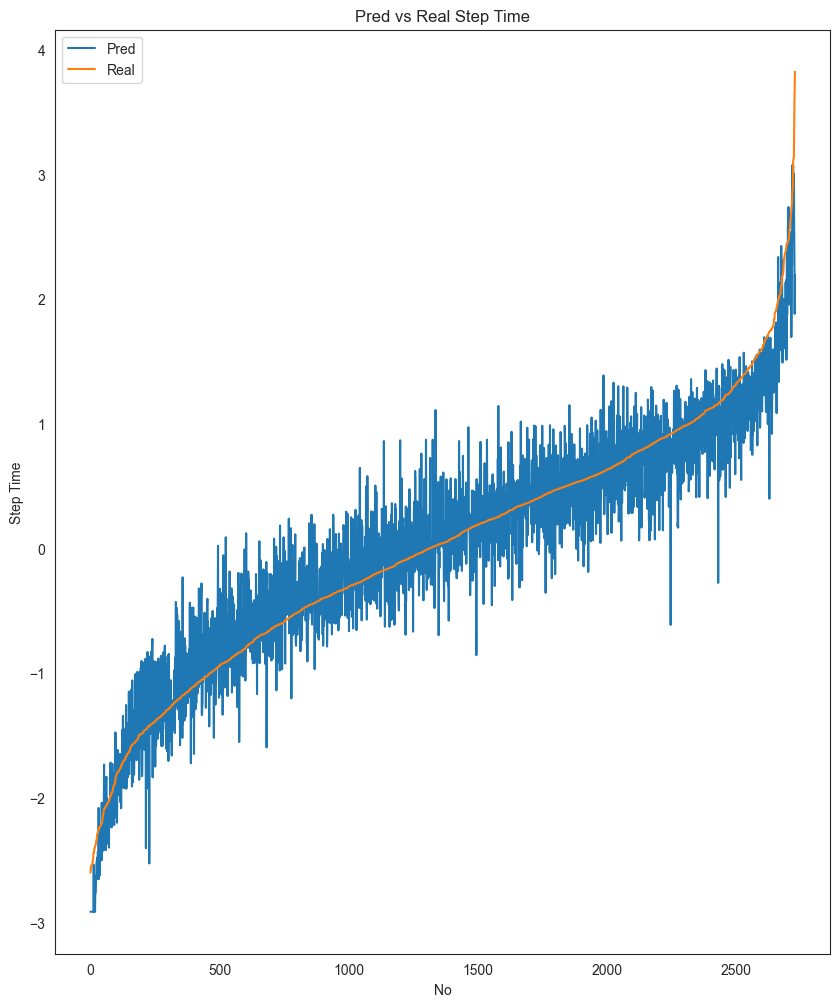

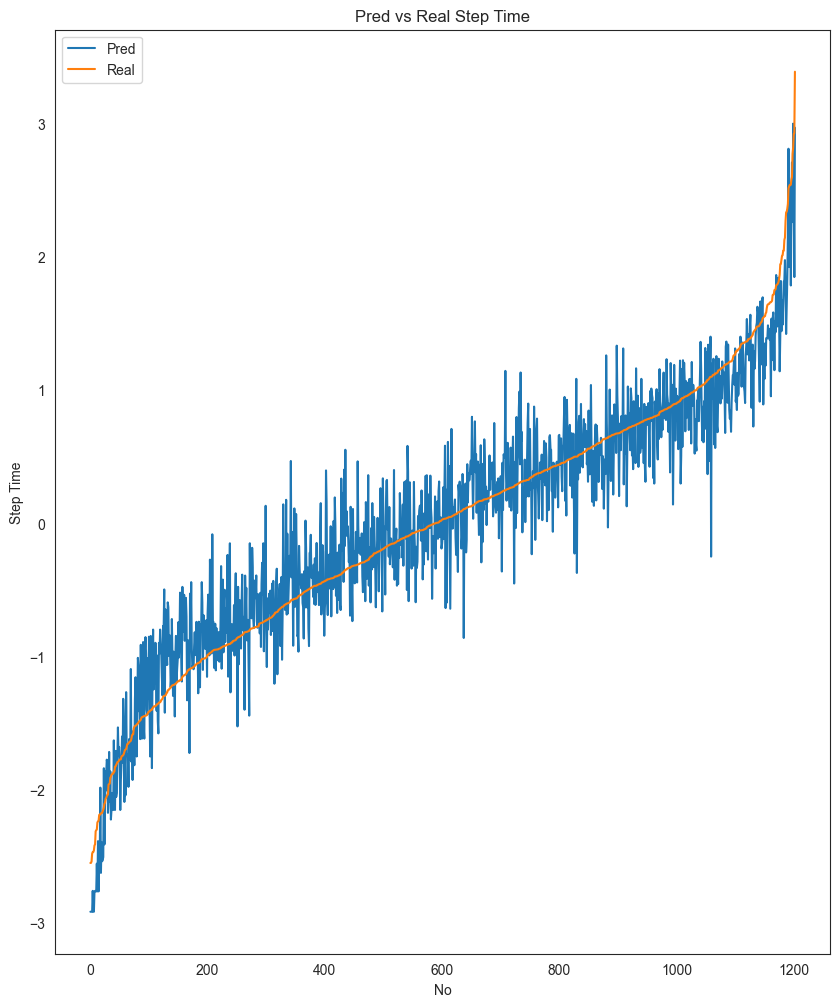

In [21]:
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())

In [22]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_data, y_data)

y_data_pred = lin_regressor.predict(x_data)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)
print("ALL RMSE:", rmse_all)

ALL RMSE: 0.304760972343724


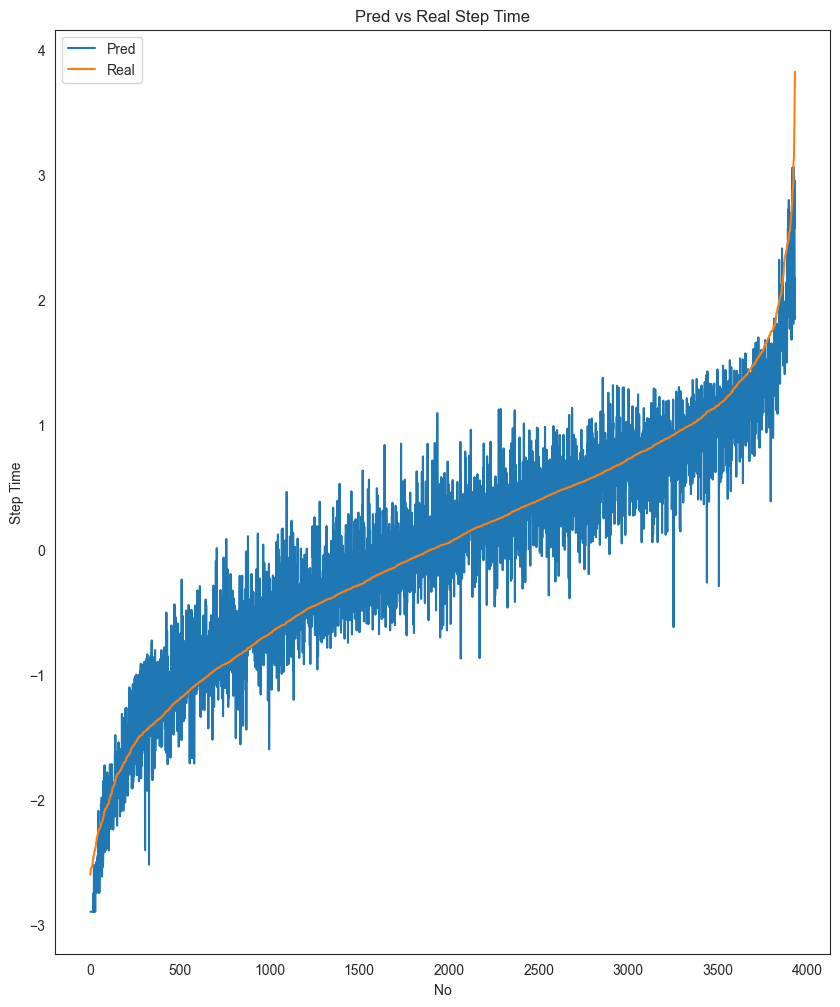

In [23]:
draw_pred_lines(list(y_data_pred[:, -1]), y_data["steps_time"].to_list())

# 2. ANN Regression

In [24]:
rcParams["figure.figsize"] = 7, 5

In [25]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=9))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=300)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 1.3620 - val_loss: 1.1527
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0009 - val_loss: 0.9920
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8651 - val_loss: 0.8839
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7635 - val_loss: 0.7835
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6830 - val_loss: 0.7097
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6135 - val_loss: 0.6386
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5589 - val_loss: 0.5807
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5092 - val_loss: 0.5474
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4701 - val_loss: 0.4896
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4339 - val_loss: 0.4512
Epoch 11

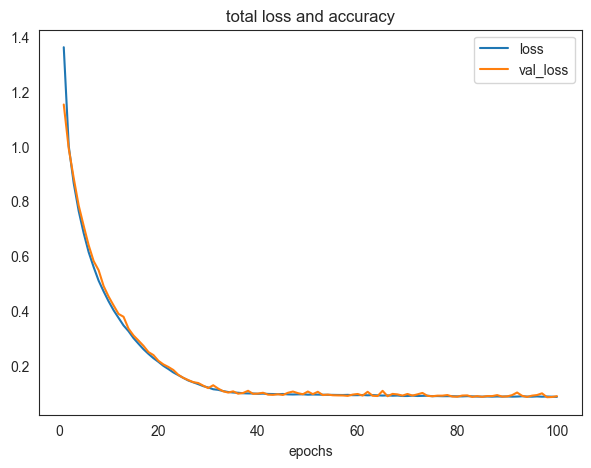

In [26]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label="val_loss")
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

In [27]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_data_pred = model.predict(x_data)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)
print("ALL RMSE:", rmse_all)

123/123 [==============================] - 0s 755us/step
TRAIN Root Mean Squared Error(RMSE): 0.30006834217157213
TEST Root Mean Squared Error(RMSE): 0.29536187066086994
ALL RMSE: 0.2986359033919912


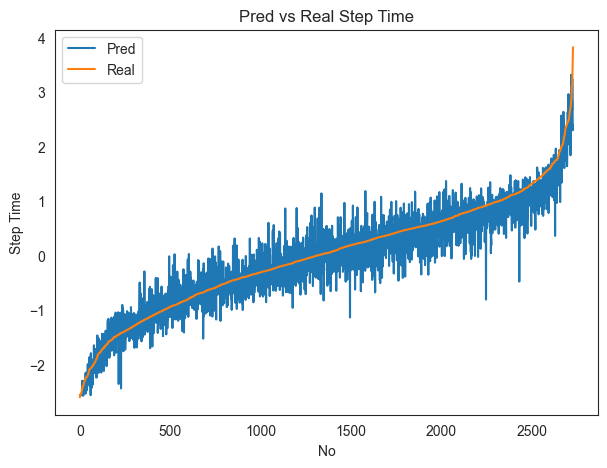

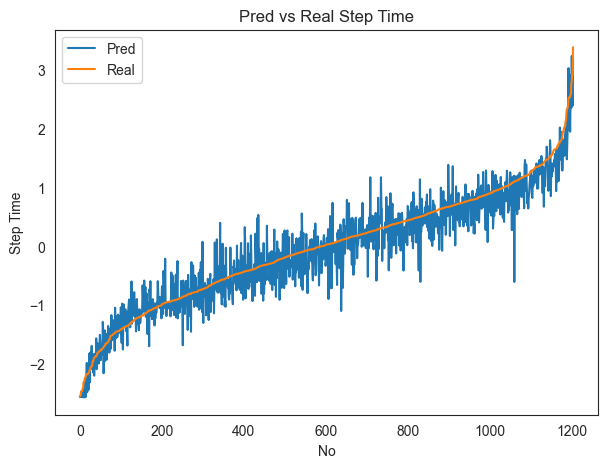

In [28]:
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())

In [29]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=9))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=1)

Epoch 1/10
2728/2728 [==============================] - 4s 1ms/step - loss: 0.1896 - val_loss: 0.1088
Epoch 2/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1086 - val_loss: 0.0908
Epoch 3/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1026 - val_loss: 0.0898
Epoch 4/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1008 - val_loss: 0.0882
Epoch 5/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0974 - val_loss: 0.0890
Epoch 6/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0971 - val_loss: 0.0857
Epoch 7/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0972 - val_loss: 0.0882
Epoch 8/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0967 - val_loss: 0.0841
Epoch 9/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0949 - val_loss: 0.1044
Epoch 10/10
2728/2728 [==============================] - 3s 1ms/step - loss: 0.094

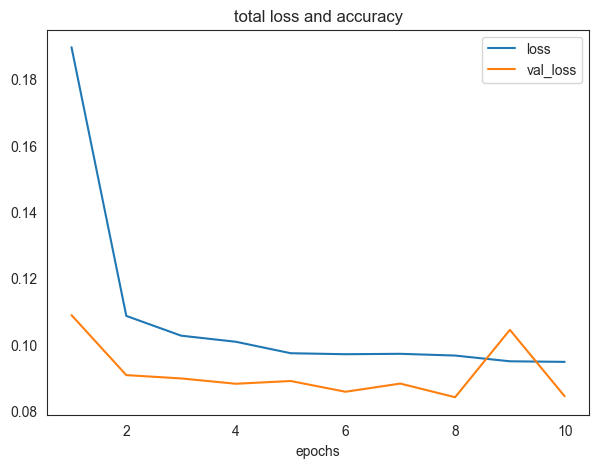

In [30]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label='val_loss')
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

123/123 [==============================] - 0s 743us/step
TRAIN Root Mean Squared Error(RMSE): 0.29920713726854903
TEST Root Mean Squared Error(RMSE): 0.2904753680455721
ALL RMSE: 0.29656226375402284


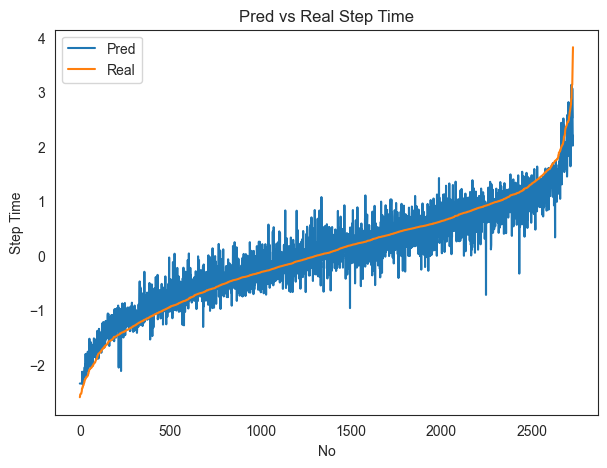

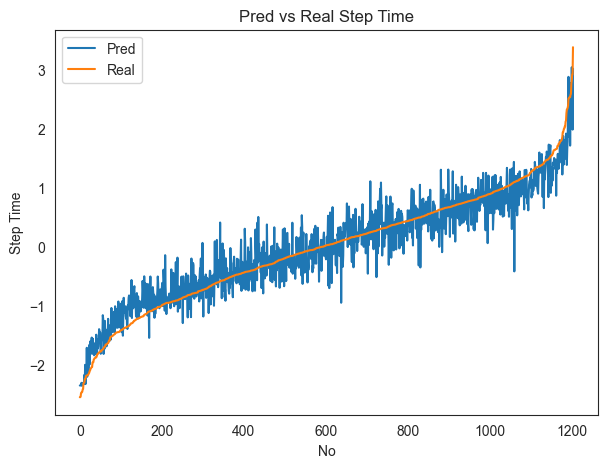

In [31]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_data_pred = model.predict(x_data)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)
print("ALL RMSE:", rmse_all)
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())

In [32]:
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=9))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1)

Epoch 1/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.4835 - val_loss: 0.0954
Epoch 2/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1076 - val_loss: 0.0902
Epoch 3/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1050 - val_loss: 0.0913
Epoch 4/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1025 - val_loss: 0.0934
Epoch 5/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1031 - val_loss: 0.0890
Epoch 6/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1001 - val_loss: 0.0891
Epoch 7/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1009 - val_loss: 0.0805
Epoch 8/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1019 - val_loss: 0.0864
Epoch 9/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0998 - val_loss: 0.0964
Epoch 10/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.097

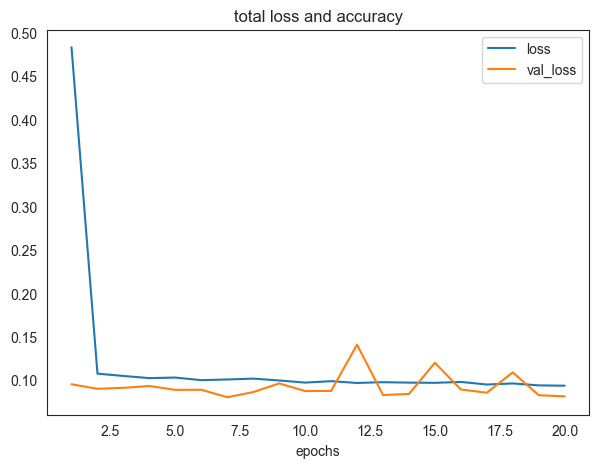

In [33]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label='val_loss')
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

123/123 [==============================] - 0s 760us/step
TRAIN Root Mean Squared Error(RMSE): 0.2857806956858376
TEST Root Mean Squared Error(RMSE): 0.28547658563098627
ALL RMSE: 0.28568766234118775


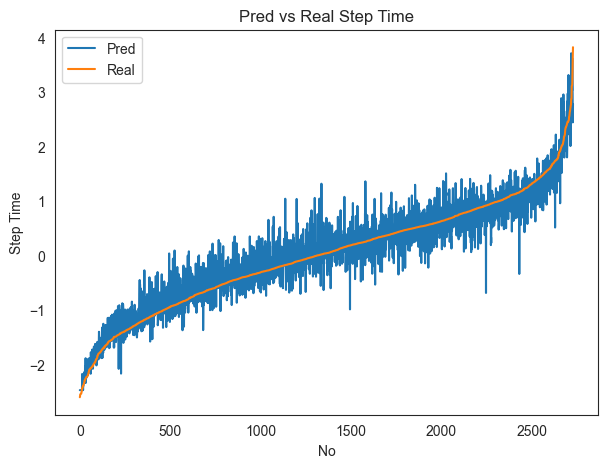

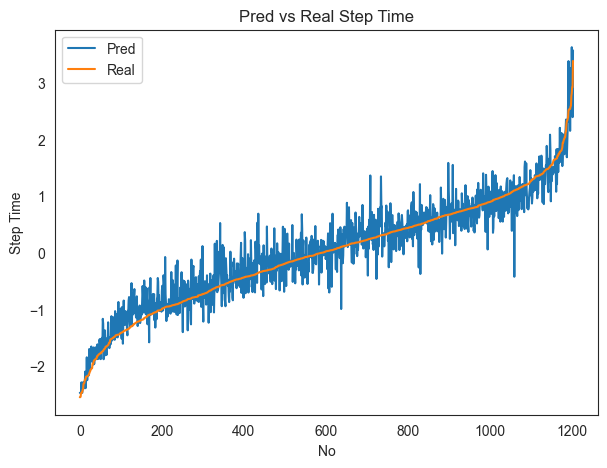

In [34]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_data_pred = model.predict(x_data)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)
print("ALL RMSE:", rmse_all)
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())

In [35]:
model = Sequential()
model.add(Dense(units=30, activation='relu', input_dim=9))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu' ))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1)

Epoch 1/20
2728/2728 [==============================] - 4s 1ms/step - loss: 0.1534 - val_loss: 0.0842
Epoch 2/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.1054 - val_loss: 0.0814
Epoch 3/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0995 - val_loss: 0.0949
Epoch 4/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0974 - val_loss: 0.0854
Epoch 5/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0955 - val_loss: 0.0971
Epoch 6/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0918 - val_loss: 0.0770
Epoch 7/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0894 - val_loss: 0.0948
Epoch 8/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0895 - val_loss: 0.0810
Epoch 9/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.0890 - val_loss: 0.0878
Epoch 10/20
2728/2728 [==============================] - 3s 1ms/step - loss: 0.087

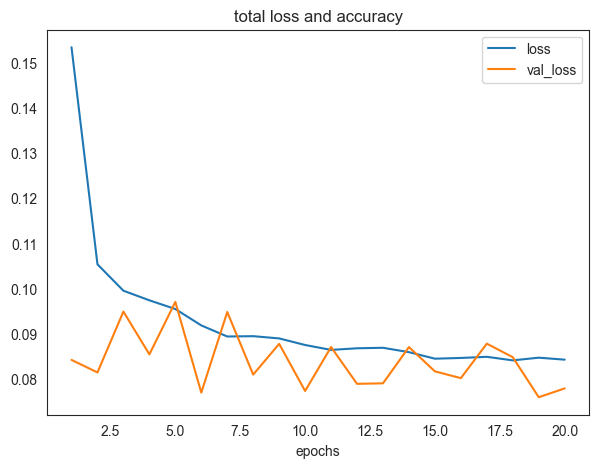

In [36]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label='val_loss')
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

123/123 [==============================] - 0s 891us/step
TRAIN Root Mean Squared Error(RMSE): 0.2785929752935829
TEST Root Mean Squared Error(RMSE): 0.2791044077329212
ALL RMSE: 0.2787495886792118


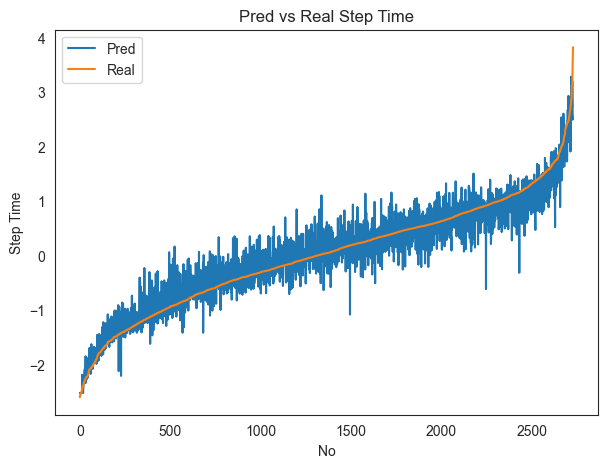

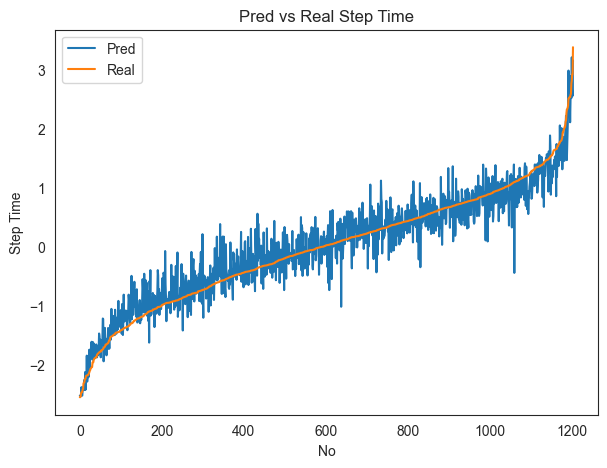

In [37]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_data_pred = model.predict(x_data)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)
print("ALL RMSE:", rmse_all)
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())